In [1]:
import tensorflow as tf
import numpy as np
import pickle


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_6_4.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:10800,:]
#x_test = input_data[5770840:, :]


(10800, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_6_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:10800,:]
#y_test = output_data[5770840:, :]
print(output_data.shape)

(10800, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 200, verbose = 2)#, validation_data = (x_test, y_test))


Train on 10800 samples
Epoch 1/200
10800/10800 - 1s - loss: 0.4178 - accuracy: 0.8060
Epoch 2/200
10800/10800 - 0s - loss: 0.2183 - accuracy: 0.9097
Epoch 3/200
10800/10800 - 0s - loss: 0.1953 - accuracy: 0.9099
Epoch 4/200
10800/10800 - 0s - loss: 0.1844 - accuracy: 0.9101
Epoch 5/200
10800/10800 - 0s - loss: 0.1749 - accuracy: 0.9136
Epoch 6/200
10800/10800 - 0s - loss: 0.1680 - accuracy: 0.9156
Epoch 7/200
10800/10800 - 0s - loss: 0.1606 - accuracy: 0.9194
Epoch 8/200
10800/10800 - 0s - loss: 0.1540 - accuracy: 0.9217
Epoch 9/200
10800/10800 - 0s - loss: 0.1471 - accuracy: 0.9251
Epoch 10/200
10800/10800 - 0s - loss: 0.1409 - accuracy: 0.9274
Epoch 11/200
10800/10800 - 0s - loss: 0.1360 - accuracy: 0.9304
Epoch 12/200
10800/10800 - 0s - loss: 0.1302 - accuracy: 0.9326
Epoch 13/200
10800/10800 - 0s - loss: 0.1245 - accuracy: 0.9357
Epoch 14/200
10800/10800 - 0s - loss: 0.1195 - accuracy: 0.9385
Epoch 15/200
10800/10800 - 0s - loss: 0.1157 - accuracy: 0.9405
Epoch 16/200
10800/10800 -

Epoch 129/200
10800/10800 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 130/200
10800/10800 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 131/200
10800/10800 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 132/200
10800/10800 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 133/200
10800/10800 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 134/200
10800/10800 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 135/200
10800/10800 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 136/200
10800/10800 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 137/200
10800/10800 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 138/200
10800/10800 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 139/200
10800/10800 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 140/200
10800/10800 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 141/200
10800/10800 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 142/200
10800/10800 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 143/200
10800/10800 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 144/200
10800/10800

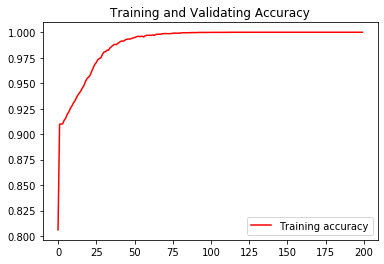

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
#plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_6_4_model.h5')